In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [2]:
dataset = pd.read_csv('GOOG_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    975 non-null    object 
 1   open    975 non-null    float64
 2   high    975 non-null    float64
 3   low     975 non-null    float64
 4   close   975 non-null    float64
 5   volume  975 non-null    int64  
 6   Name    975 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 53.4+ KB


In [4]:
dataset.drop('Name', axis = 1, inplace = True)

In [5]:
dataset

,date,open,high,low,close,volume
0,2014-03-27,568.000,568.00,552.92,558.46,13052
1,2014-03-28,561.200,566.43,558.67,559.99,41003
2,2014-03-31,566.890,567.00,556.93,556.97,10772
3,2014-04-01,558.710,568.45,558.71,567.16,7932
4,2014-04-02,565.106,604.83,562.19,567.00,146697
...,...,...,...,...,...,...
970,2018-02-01,1162.610,1174.00,1157.52,1167.70,2412114
971,2018-02-02,1122.000,1123.07,1107.28,1111.90,4857943
972,2018-02-05,1090.600,1110.00,1052.03,1055.80,3798301
973,2018-02-06,1027.180,1081.71,1023.14,1080.60,3447956


In [6]:
dataset = dataset.set_index('date')
dataset.index = pd.to_datetime(dataset.index)

In [7]:
dataset

,open,high,low,close,volume
date,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13052
2014-03-28,561.200,566.43,558.67,559.99,41003
2014-03-31,566.890,567.00,556.93,556.97,10772
2014-04-01,558.710,568.45,558.71,567.16,7932
2014-04-02,565.106,604.83,562.19,567.00,146697
...,...,...,...,...,...
2018-02-01,1162.610,1174.00,1157.52,1167.70,2412114
2018-02-02,1122.000,1123.07,1107.28,1111.90,4857943
2018-02-05,1090.600,1110.00,1052.03,1055.80,3798301


In [8]:
dataset.index

DatetimeIndex(['2014-03-27', '2014-03-28', '2014-03-31', '2014-04-01',
               '2014-04-02', '2014-04-03', '2014-04-04', '2014-04-07',
               '2014-04-08', '2014-04-09',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=975, freq=None)

In [9]:
dataset = dataset.loc[:, ['close']]

<function matplotlib.pyplot.show(close=None, block=None)>

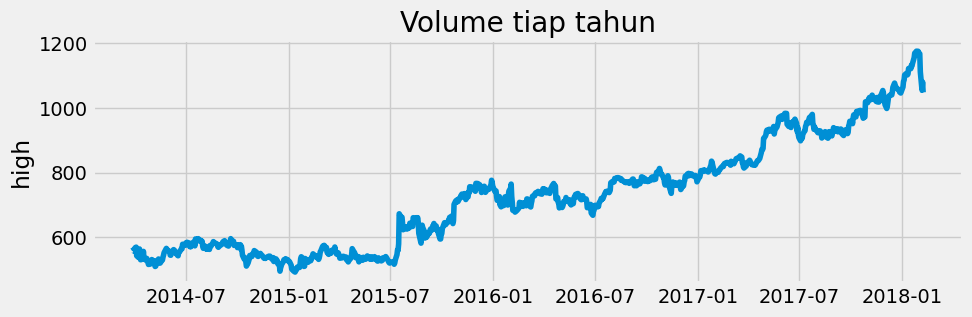

In [10]:
plt.figure(figsize=(10,3))
plt.plot(dataset.index, dataset)
plt.title('Volume tiap tahun')
plt.ylabel('high')
plt.show

<Axes: xlabel='date'>

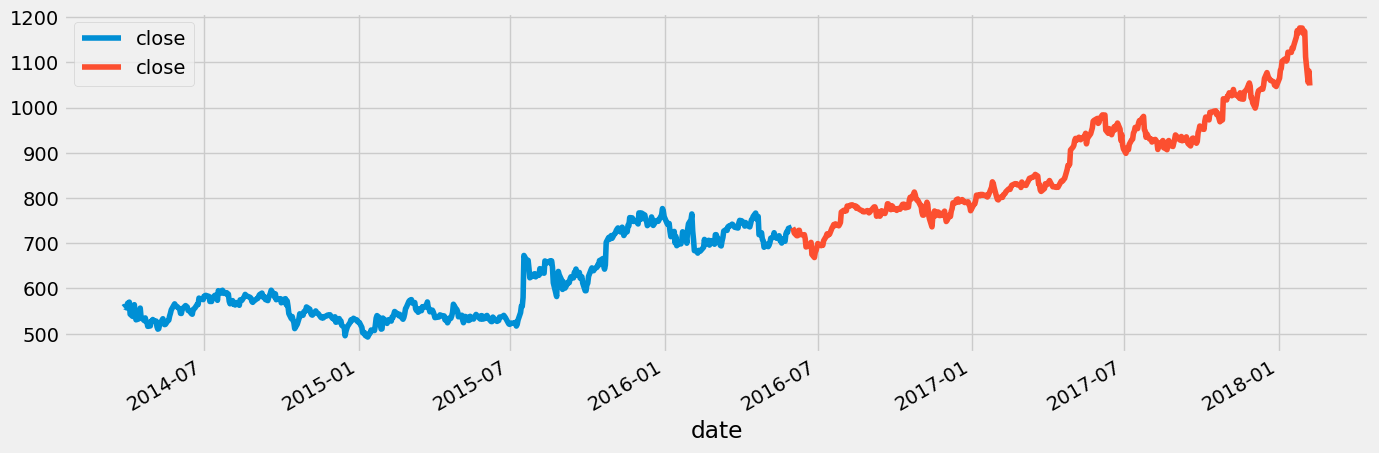

In [11]:
train = dataset.loc[dataset.index < '06-01-2016']
test = dataset.loc[dataset.index >= '06-01-2016']

fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax)
test.plot(ax=ax)

In [12]:
def fitur_baru(dataset):
  dataset = dataset.copy()
  dataset['year'] = dataset.index.year
  dataset['quarter'] = dataset.index.quarter
  dataset['month'] = dataset.index.month
  return dataset

dataset = fitur_baru(dataset)

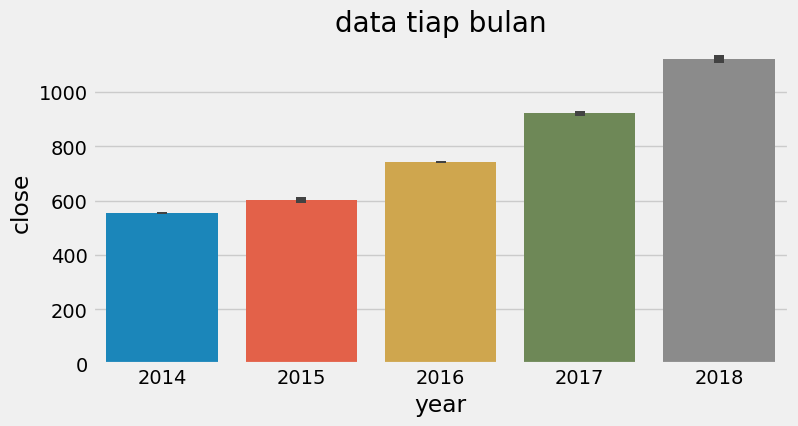

In [13]:
fig , ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=dataset, x='year', y='close')
plt.title('data tiap bulan')
plt.show()

In [14]:
train = fitur_baru(train)
test = fitur_baru(test)

x = ['year', 'quarter', 'month']
y = 'close'

In [15]:
x_train = train[x]
y_train = train[y]

x_test = test[x]
y_test = test[y]

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [17]:
test['prediksi'] = y_pred
dataset = dataset.merge(test[['prediksi']], how = 'left', left_index=True, right_index=True)

In [18]:
dataset

,close,year,quarter,month,prediksi
date,,,,,
2014-03-27,558.46,2014,1,3,NaN
2014-03-28,559.99,2014,1,3,NaN
2014-03-31,556.97,2014,1,3,NaN
2014-04-01,567.16,2014,2,4,NaN
2014-04-02,567.00,2014,2,4,NaN
...,...,...,...,...,...
2018-02-01,1167.70,2018,1,2,886.86169
2018-02-02,1111.90,2018,1,2,886.86169
2018-02-05,1055.80,2018,1,2,886.86169


<Axes: xlabel='date'>

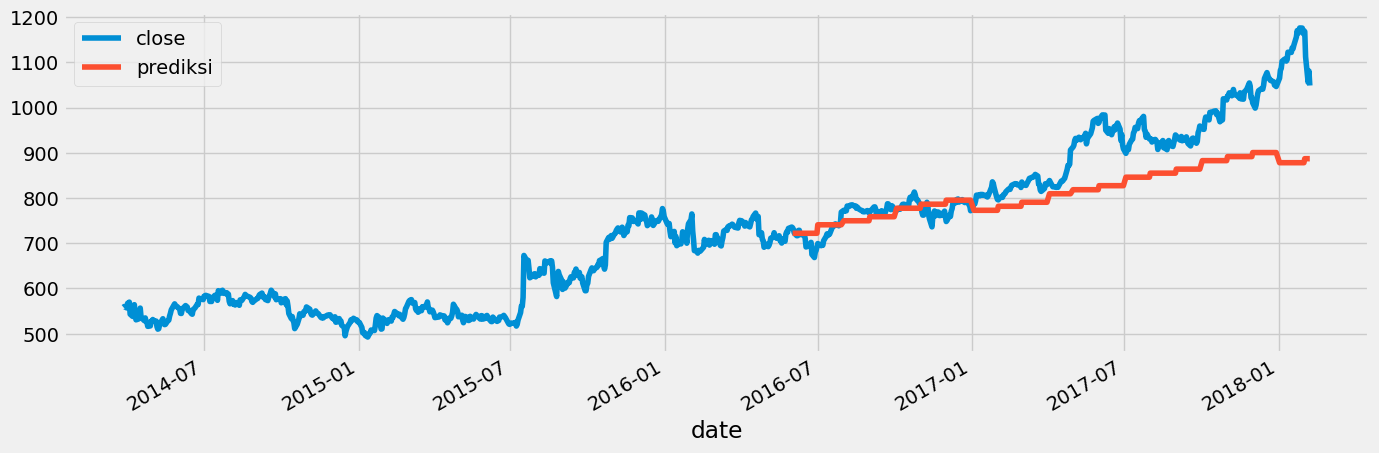

In [19]:
ax = dataset[['close']].plot(figsize=(15,5))
dataset[['prediksi']].plot(ax=ax, style='-')

In [20]:
r2_score(y_test, y_pred)*100

32.25607221760263

<Axes: xlabel='date'>

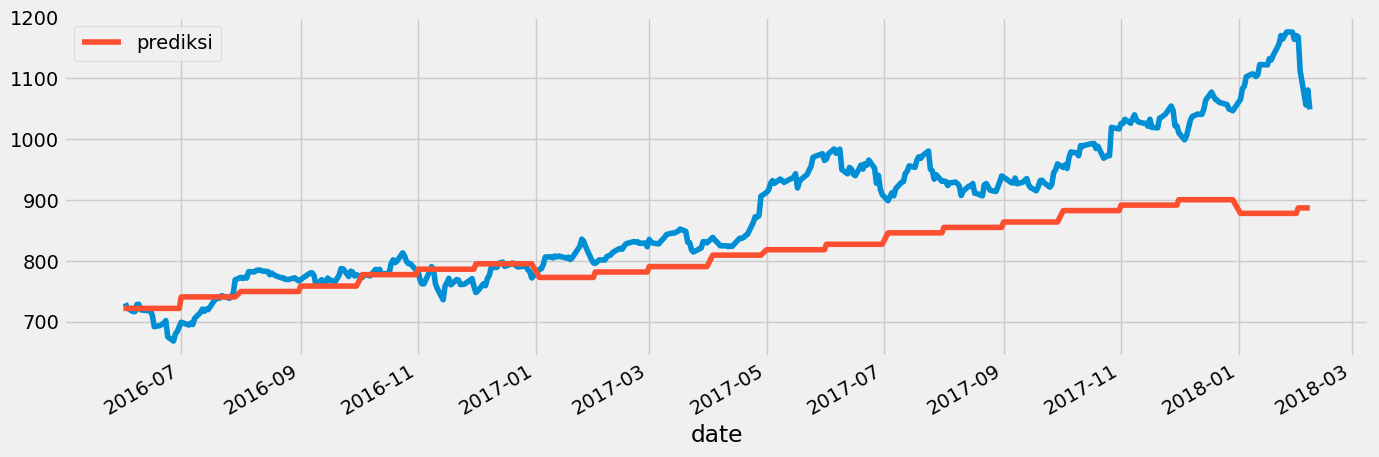

In [21]:
ax = dataset.loc[(dataset.index > '06-01-2016')]['close'].plot(figsize=(15,5))
dataset[['prediksi']].plot(ax=ax, style='-')